# KNN

### 1. Implement a KNN model to classify the animals in to categorie

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Load dataset
df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\Zoo.csv")

In [17]:
# Describe the data
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [18]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


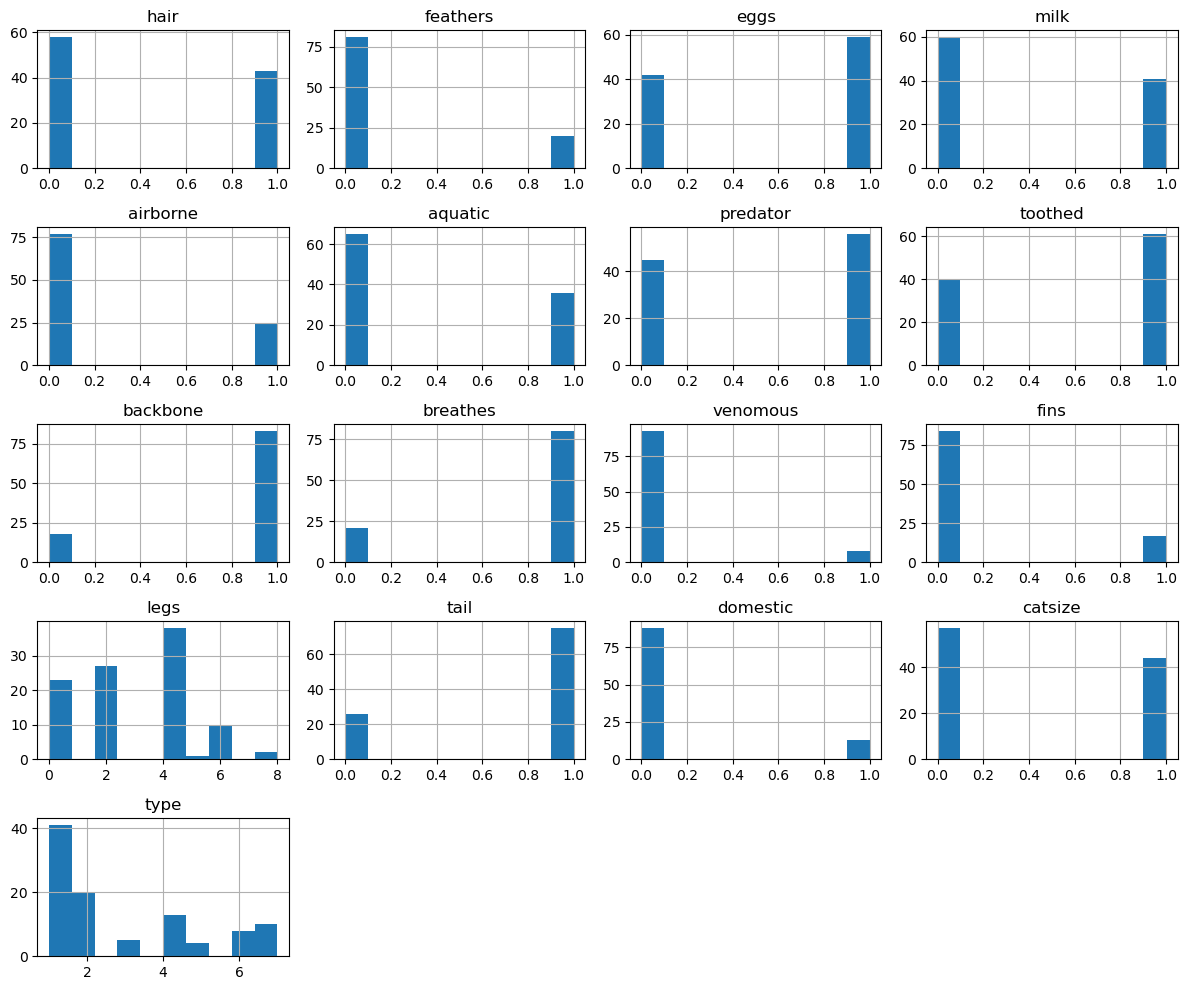

In [19]:
# Visualize histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [20]:
# Split dataset into features and target variable
X = df.drop(columns=['animal name', 'type'])
y = df['type']

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Model building
knn = KNeighborsClassifier()

In [24]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [25]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.9285714285714286


In [26]:
# Predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9354838709677419


### 2. Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [30]:
# Load the dataset
data = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\glass.csv")

In [45]:
# Describe the data
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [36]:
# Missing values imputation
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

In [37]:
# Convert imputed data back to DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

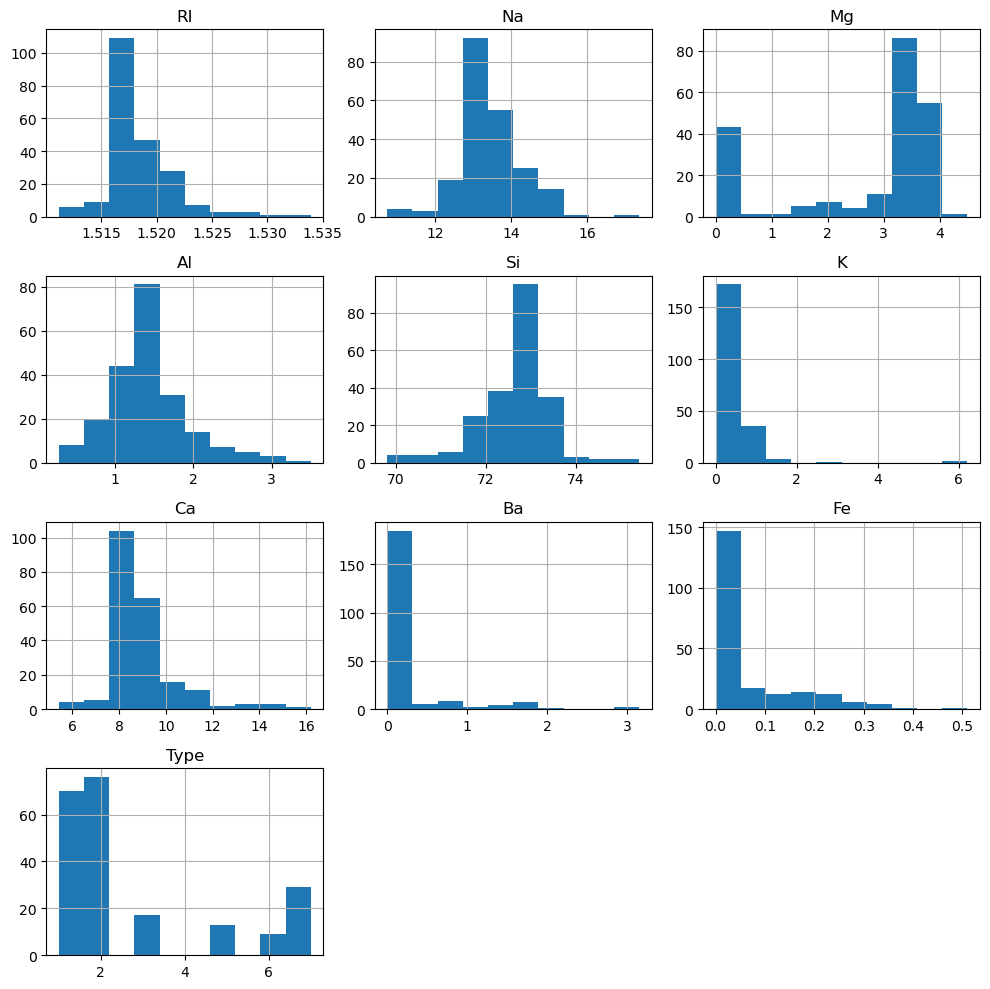

In [38]:
# Plot histograms
data_imputed.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [49]:
# Split data into features and target
X = data_imputed.drop("Type", axis=1)
y = data_imputed["Type"]

In [50]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
# Model building
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Predict
y_pred = knn_classifier.predict(X_test)

In [59]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6976744186046512


In [60]:
# Hyperparameter Tuning for KNN (example with grid search)
from sklearn.model_selection import GridSearchCV

In [61]:
# Define parameters grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

In [62]:
# Grid search
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [58]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}


In [66]:
# Re-train the model with best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [67]:
# Predict
y_pred_best = best_knn.predict(X_test)

In [68]:
# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Improved Accuracy:", accuracy_best)

Improved Accuracy: 0.813953488372093
